In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.style.use('seaborn')
from matplotlib import pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train_set = pd.read_csv("preprocessed_train_2.csv", index_col="index")

train_set["change_type"] = train_set["change_type"].map({'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5})

mask2 = train_set["change_type"] == 2
mask3 = train_set["change_type"] == 3

In [3]:
df = pd.concat([train_set[mask2], train_set[mask3]])

In [4]:
df["change_type"] = df["change_type"].apply(lambda x : 0 if x == 2 else 1)

In [5]:
df["change_type"].value_counts()

0    164120
1     99462
Name: change_type, dtype: int64

In [6]:
X = df.drop(columns=["change_type"])
y = df["change_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

<h1> Data Analysis

In [7]:
df.head()

,change_type,date2,date3,date4,date5,area,perimeter,Dense Urban,Industrial,Rural,...,change_4_to_5_Operational - Prior Construction,change_4_to_5_Prior Construction - Construction Done,change_4_to_5_Prior Construction - Construction Midway,change_4_to_5_Prior Construction - Construction Started,change_4_to_5_Prior Construction - Excavation,change_4_to_5_Prior Construction - Greenland,change_4_to_5_Prior Construction - Land Cleared,change_4_to_5_Prior Construction - Materials Dumped,change_4_to_5_Prior Construction - Operational,change_4_to_5_Prior Construction - Prior Construction
index,,,,,,,,,,,,,,,,,,,,,
9,0,472,1003,1595,2182,-14.860503,-5.891260,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38,0,472,1003,1595,2182,-13.841195,-5.538859,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,472,1003,1595,2182,-15.467013,-6.096927,0,1,0,...,0,0,0,0,0,0,0,0,0,0
74,0,472,1003,1595,2182,-15.353955,-5.977966,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127,0,472,1003,1595,2182,-16.023037,-6.616222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


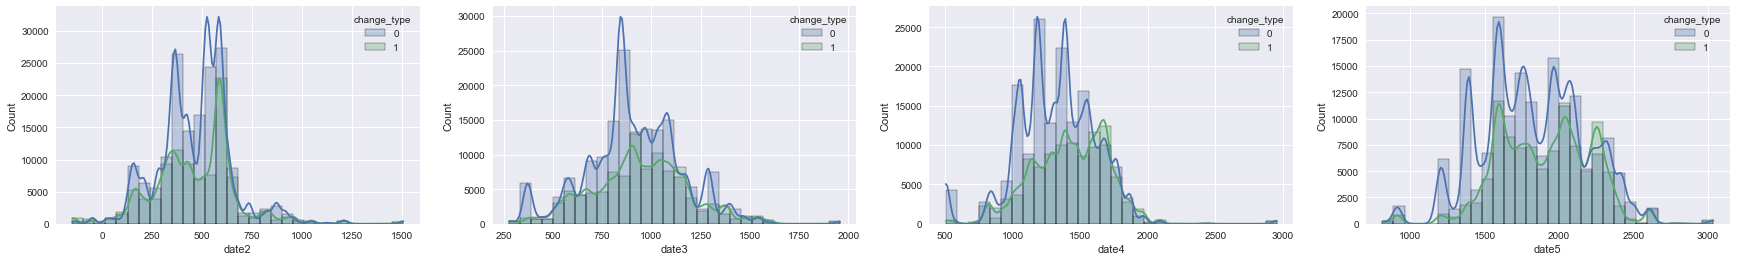

In [8]:
# Let's begin by the dates

dates = ["date2", "date3", "date4", "date5"]

fig, axes = plt.subplots(1, 4, figsize = (30,4))

for i, date in enumerate(dates) :

    sns.histplot(df, x = date, ax = axes[i], kde = True, bins = 30, alpha = 0.3, hue = "change_type")

plt.show()

<AxesSubplot:xlabel='area', ylabel='Count'>

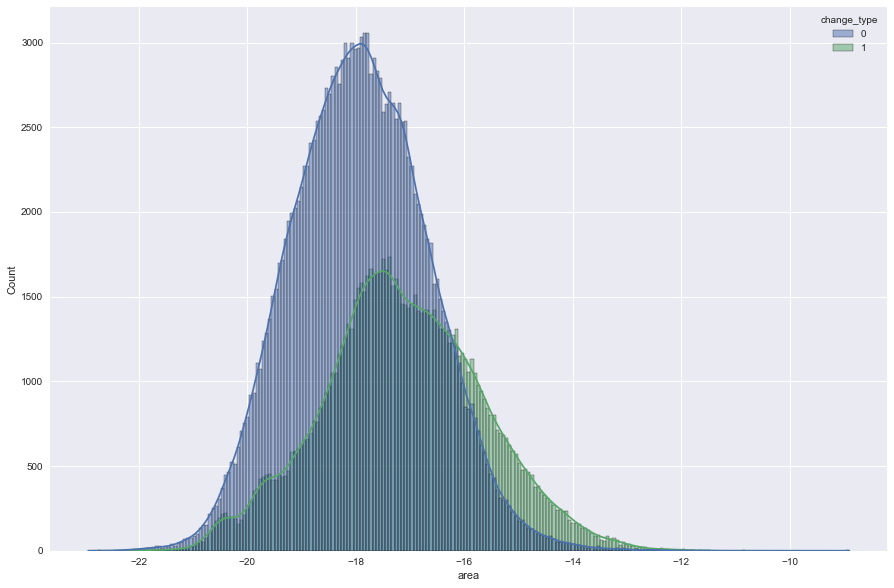

In [12]:
# The area

plt.figure(figsize=(15,10))
sns.histplot(data = df, x = "area", hue = "change_type", kde = True)

<h1> Models

<h2> Model 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

clf_forest = RandomForestClassifier().fit(X_train, y_train)
clf_ada = AdaBoostClassifier().fit(X_train, y_train)
clf_xgb = GradientBoostingClassifier().fit(X_train, y_train)

In [12]:
print(classification_report(clf_forest.predict(X_test), y_test))
print(classification_report(clf_ada.predict(X_test), y_test))
print(classification_report(clf_xgb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     43579
           1       0.64      0.72      0.68     22317

    accuracy                           0.77     65896
   macro avg       0.74      0.76      0.75     65896
weighted avg       0.78      0.77      0.77     65896

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     47423
           1       0.50      0.68      0.58     18473

    accuracy                           0.72     65896
   macro avg       0.68      0.71      0.68     65896
weighted avg       0.75      0.72      0.73     65896

              precision    recall  f1-score   support

           0       0.86      0.75      0.80     47050
           1       0.52      0.69      0.60     18846

    accuracy                           0.73     65896
   macro avg       0.69      0.72      0.70     65896
weighted avg       0.76      0.73      0.74     65896



In [ ]:
clf_forest_opti = RandomForestClassifier(class_weight="balanced").fit(X_train, y_train)


In [16]:
from sklearn.model_selection import GridSearchCV

clf_forest = RandomForestClassifier()
params = {"class_weight" : [{0:1, 1:2}, "balanced", {0:1, 1:4}, {0:0.5, 1:5}]}

clf_forest_opti = GridSearchCV(clf_forest, params)
clf_forest_opti.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2}, 'balanced',
                                          {0: 1, 1: 4}, {0: 0.5, 1: 5}]})

In [18]:
clf_forest_opti.best_params_

{'class_weight': 'balanced'}

In [17]:
print(classification_report(clf_forest_opti.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     43520
           1       0.65      0.71      0.68     22376

    accuracy                           0.77     65896
   macro avg       0.75      0.76      0.75     65896
weighted avg       0.78      0.77      0.77     65896



<h2> Model 2

In [8]:
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler

x1, y1 = RandomUnderSampler(sampling_strategy="majority").fit_resample(X_train, y_train)
x2, y2 = RandomUnderSampler(sampling_strategy="majority").fit_resample(X_train, y_train)

In [9]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat,average='macro'), True

In [10]:
model1 = LGBMClassifier(metric = "lgb_f1_score").fit(x1, y1)
model2 = LGBMClassifier().fit(x2, y2)
model3 = LGBMClassifier(metric = "lgb_f1_score").fit(X_train, y_train)


In [12]:
print(classification_report(y_test, model1.predict(X_test)))
print(classification_report(y_test, model2.predict(X_test)))
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79     40986
           1       0.65      0.81      0.72     24910

    accuracy                           0.76     65896
   macro avg       0.76      0.77      0.76     65896
weighted avg       0.78      0.76      0.77     65896

              precision    recall  f1-score   support

           0       0.86      0.74      0.79     40986
           1       0.65      0.81      0.72     24910

    accuracy                           0.76     65896
   macro avg       0.76      0.77      0.76     65896
weighted avg       0.78      0.76      0.77     65896

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     40986
           1       0.73      0.66      0.69     24910

    accuracy                           0.78     65896
   macro avg       0.77      0.76      0.76     65896
weighted avg       0.78      0.78      0.78     65896



In [13]:
print(confusion_matrix(y_test, model1.predict(X_test)))
print(confusion_matrix(y_test, model3.predict(X_test)))

[[30140 10846]
 [ 4758 20152]]
[[34945  6041]
 [ 8464 16446]]


In [39]:
from sklearn.decomposition import PCA

x_red= PCA().fit_transform(X_train, y_train)

In [40]:
model4 = LGBMClassifier().fit(x_red, y_train)

print(confusion_matrix(y_test, model4.predict(X_test)))

[[37110  3886]
 [23761  1139]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(max_depth=10, n_estimators=500).fit(X_train, y_train)

In [43]:
print(confusion_matrix(y_test, model5.predict(X_test)))

[[37421  3575]
 [15365  9535]]


In [13]:
model6 = LGBMClassifier(bagging_fraction = 0.3).fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


In [14]:
print(classification_report(y_test, model6.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     40950
           1       0.73      0.66      0.69     24946

    accuracy                           0.78     65896
   macro avg       0.77      0.76      0.76     65896
weighted avg       0.78      0.78      0.78     65896



<h2> Model Bao

In [7]:
from xgboost import XGBClassifier

dico = {
    "booster": "dart",
    "lambda": 0.006277280353771211,
    "alpha": 0.6608034452167744,
    "subsample": 0.6368237400610851,
    "colsample_bytree": 0.5584744160503385,
    "max_depth": 9,
    "min_child_weight": 3,
    "eta": 1.7237157929124854e-05,
    "gamma": 0.08742989220484203,
    "grow_policy": "lossguide",
    "sample_type": "weighted",
    "normalize_type": "forest",
    "rate_drop": 1.7562797525285437e-06,
    "skip_drop": 0.033132988184049916

}
xgb_classifier = XGBClassifier(params = dico).fit(X_train, y_train)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [8]:
print(classification_report(y_test, xgb_classifier.predict(X_test)))
confusion_matrix(y_test, xgb_classifier.predict(X_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84     40887
           1       0.75      0.67      0.71     25009

    accuracy                           0.79     65896
   macro avg       0.78      0.77      0.77     65896
weighted avg       0.79      0.79      0.79     65896



array([[35274,  5613],
       [ 8214, 16795]], dtype=int64)